In [39]:
import pandas as pd 
import os 
import numpy as np
import matplotlib.pyplot as plt

In [40]:
# Obtendo o diretório atual do script
#diretorio_atual = os.path.dirname(os.path.abspath('__file__'))

# Construindo o caminho para o arquivo CSV usando o caminho relativo
#caminho = os.path.join(diretorio_atual,'..','..','..','..','Data', 'Bases Modificadas', 'correlacoes_entopia_removido.csv')

# Carregando o arquivo CSV
df = pd.read_csv(r'C:\Users\maype\OneDrive - sga.pucminas.br\Área de Trabalho\Faculdade\projects\Utilizando-Modelos-de-Machine-Learning-para-Caracterização-da-Depressão-no-Brasil\Data\Bases Modificadas\correlacoes_entopia_removido.csv')

In [41]:
df.columns

Index(['Sexo', 'Apoio_Familiar', 'Apoio_de_Amigos', 'Curso_Mais_Elevado',
       'Diagnostico_Depressao', 'Estado_de_Saude', 'Pratica_Exercicio',
       'Procura_Atendimento_Saude', 'Problemas_Sono', 'peso_consolidado(KG)',
       'altura_consolidada(CM)', 'IMC', 'renda_total', 'idade', 'trabalhou',
       'doencas_cronicas', 'moradia_vulneravel', 'freq_bebida_alcoolica',
       'Consumo de Graos e Tuberculos', 'Consumo de Leguminosas',
       'Consumo de Carnes', 'Consumo de Ovos', 'Consumo de Verduras e Legumes',
       'Consumo de Frutas', 'Consumo de Laticinios', 'Consumo de Oleaginosas',
       'Consumo de Refrigerantes', 'Consumo de Sucos Industrializados',
       'Consumo de Sucos Naturais', 'Consumo de Bebidas Lacteas',
       'Consumo de Salgadinhos e Biscoitos Salgados',
       'Consumo de Doces e Sobremesas Industrializadas',
       'Consumo de Embutidos e Alimentos Processados',
       'Consumo de Paes Industrializados',
       'Consumo de Molhos Industrializados', 'Consumo

In [42]:
colunas_numericas = ['peso_consolidado(KG)', 'altura_consolidada(CM)', 'renda_total', 'IMC']

In [43]:
# Função para detectar outliers usando o método IQR
def detectar_outliers_iqr(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr
    return data[(data < limite_inferior) | (data > limite_superior)]


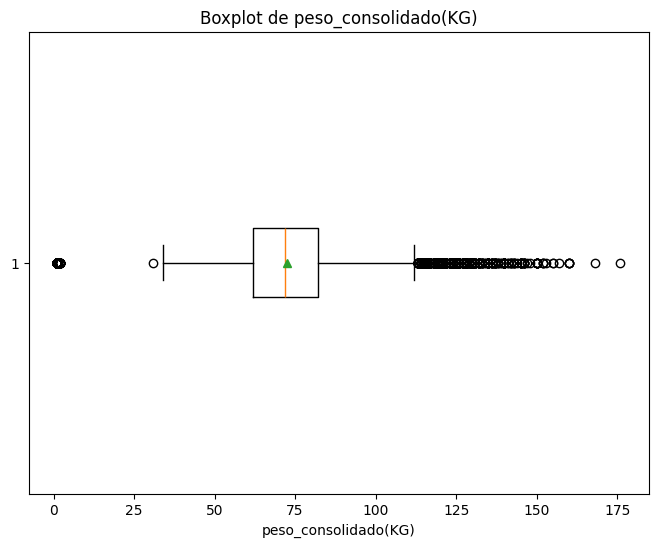

Outliers em peso_consolidado(KG):
71       127.0
87       125.0
94       129.0
102        1.0
115        1.0
         ...  
55484      1.0
55513      1.0
55544    143.0
55547    130.0
55553      1.0
Name: peso_consolidado(KG), Length: 1615, dtype: float64


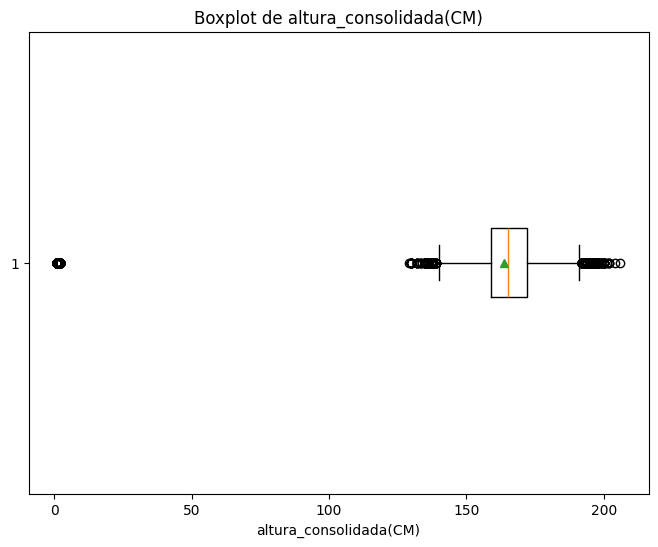

Outliers em altura_consolidada(CM):
102        2.0
115        1.0
237        1.0
321      192.0
362      192.0
         ...  
55446    139.0
55484      1.0
55513      2.0
55530    195.0
55553      1.0
Name: altura_consolidada(CM), Length: 1046, dtype: float64


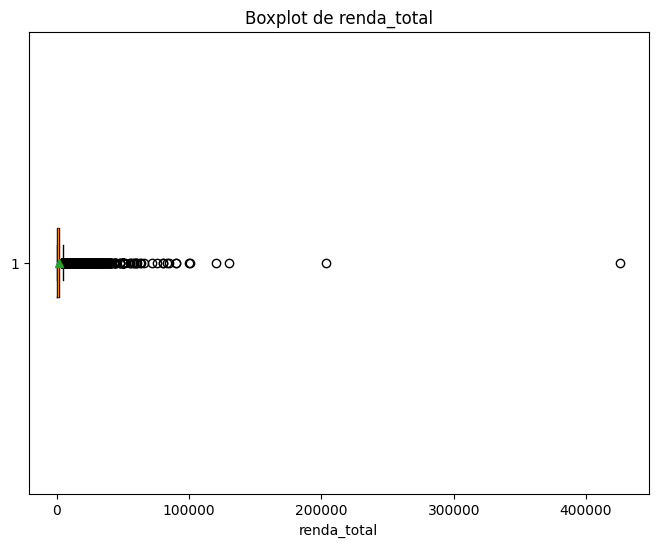

Outliers em renda_total:
9         7985.0
11       12001.0
12        8001.0
13       20001.0
49        5201.0
          ...   
55640     9131.0
55641     8501.0
55642    10001.0
55656     7201.0
55657    10001.0
Name: renda_total, Length: 4927, dtype: float64


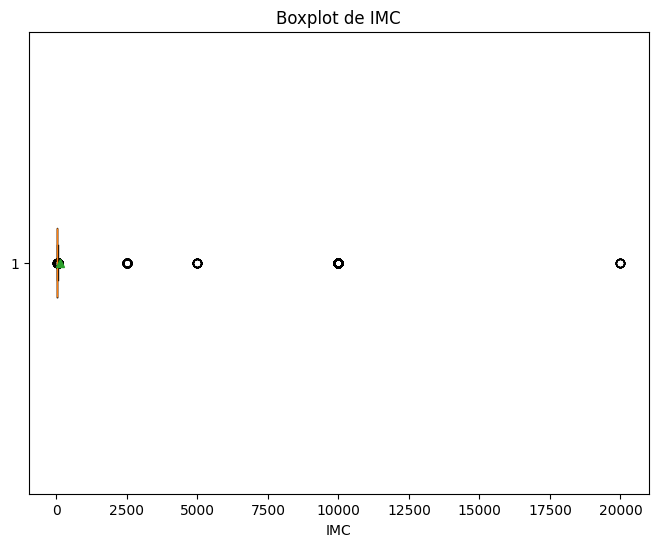

Outliers em IMC:
87          47.047311
96          39.736121
102       2500.000000
115      10000.000000
137         43.090182
             ...     
55547       41.967975
55553    10000.000000
55614       40.625000
55646       47.562426
55648       14.040816
Name: IMC, Length: 1849, dtype: float64


In [44]:
# Iterar sobre as colunas numéricas
for coluna in colunas_numericas:
    outliers = detectar_outliers_iqr(df[coluna])

    # Plotar boxplot para visualizar outliers
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[coluna], vert=False, showmeans=True, showfliers=True)
    plt.title(f'Boxplot de {coluna}')
    plt.xlabel(coluna)
    plt.show()

    # Imprimir os outliers
    print(f'Outliers em {coluna}:')
    print(outliers)


In [45]:
df['IMC'].value_counts()

IMC
10000.000000    608
23.875115       247
24.221453       239
23.437500       225
25.711662       220
               ... 
16.866251         1
38.805698         1
50.666667         1
16.693279         1
14.040816         1
Name: count, Length: 3648, dtype: int64

In [46]:
# Contar a quantidade de valores únicos em cada atributo (ordenado do maior para o menor)
for coluna in df[colunas_numericas].columns:
    print(f"Coluna: {coluna}")
    print(df[coluna].value_counts().sort_values(ascending=False))  # Ordena do maior para o menor
    print("\n")



Coluna: peso_consolidado(KG)
peso_consolidado(KG)
70.0     2124
65.0     2075
72.0     1912
80.0     1813
75.0     1791
         ... 
168.0       1
148.0       1
176.0       1
144.0       1
153.0       1
Name: count, Length: 126, dtype: int64


Coluna: altura_consolidada(CM)
altura_consolidada(CM)
165.0    4222
160.0    4006
170.0    3505
175.0    2430
168.0    2267
         ... 
134.0       2
201.0       2
129.0       1
206.0       1
204.0       1
Name: count, Length: 77, dtype: int64


Coluna: renda_total
renda_total
0.0        7778
999.0      3357
2001.0     2269
1501.0     2180
1001.0     1962
           ... 
553.0         1
11661.0       1
12999.0       1
2.0           1
9131.0        1
Name: count, Length: 2832, dtype: int64


Coluna: IMC
IMC
10000.000000    608
23.875115       247
24.221453       239
23.437500       225
25.711662       220
               ... 
52.707033         1
26.106878         1
43.239490         1
43.870723         1
14.040816         1
Name: count, Length: 

In [47]:
# Removendo outliers 
limites = {
    'peso_consolidado(KG)': (50, 150),  # Limites para peso
    'altura_consolidada(CM)': (125, 210),  # Limites para altura
    'renda_total': (0, 100000),  # Limites para renda
    'IMC':(10, 60)
}

# Remover outliers em cada coluna
for coluna in colunas_numericas:
    limite_inferior, limite_superior = limites[coluna]
    df = df[(df[coluna] >= limite_inferior) & (df[coluna] <= limite_superior)]

In [48]:
df['Diagnostico_Depressao'].value_counts()

Diagnostico_Depressao
2.0    48598
1.0     4840
Name: count, dtype: int64

In [49]:
df.to_csv(r'C:\Users\maype\OneDrive - sga.pucminas.br\Área de Trabalho\Faculdade\projects\Utilizando-Modelos-de-Machine-Learning-para-Caracterização-da-Depressão-no-Brasil\Data\Bases Modificadas\df_sem_outliers.csv', index=False)